2.3.1. Загрузка данных и первичный осмотр

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('S02-hw-dataset.csv')

In [3]:
df.head(10)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [5]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


2.3.2. Пропуски, дубликаты и базовый контроль качества

In [6]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [7]:
df.duplicated().value_counts()

False    40
True      1
Name: count, dtype: int64

In [23]:
df[(df['age'] <= 10) | (df['age'] > 100) | (df['purchases'] < 0) | (df['revenue'] < 0) | ((df['purchases'] != 0) & (df['revenue'] == 0))]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
10,11,24.0,US,4,0
20,21,5.0,RU,8,1488


Обнаружены пропуски в столбце 'age' (доля ~0.05) а также одно дублирующее значение. Отрицательные и нереалистичные значения обнаружены в трех строках: возраст превышающий 100 лет, возраст менее 10 лет и нулевой доход при покупке 4 товаров. Требуется дополнительная обработка датасета.

2.3.3. Базовый EDA: группировки, агрегаты и частоты

Столбец country единственный содержит категориальные значения.

In [17]:
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [19]:
df['revenue'].groupby(df['country']).mean()

country
CN    1054.000000
DE    1445.500000
FR     675.916667
RU     790.076923
US     557.375000
Name: revenue, dtype: float64

In [20]:
df['revenue'].groupby(df['country']).sum()

country
CN     2108
DE     8673
FR     8111
RU    10271
US     4459
Name: revenue, dtype: int64

In [31]:
df['revenue'].groupby(pd.cut(df['age'], 10)).mean()

C:\Users\Polina\AppData\Local\Temp\ipykernel_22008\2761976138.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['revenue'].groupby(pd.cut(df['age'], 10)).mean()


age
(4.885, 16.5]     1488.000000
(16.5, 28.0]       604.000000
(28.0, 39.5]      1216.272727
(39.5, 51.0]       621.428571
(51.0, 62.5]       647.600000
(62.5, 74.0]              NaN
(74.0, 85.5]              NaN
(85.5, 97.0]              NaN
(97.0, 108.5]             NaN
(108.5, 120.0]     785.000000
Name: revenue, dtype: float64

In [42]:
df['revenue'].groupby(pd.cut(df['age'], 10)).sum()

C:\Users\Polina\AppData\Local\Temp\ipykernel_22008\1164922010.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['revenue'].groupby(pd.cut(df['age'], 10)).sum()


age
(4.885, 16.5]      1488
(16.5, 28.0]       8456
(28.0, 39.5]      13379
(39.5, 51.0]       4350
(51.0, 62.5]       3238
(62.5, 74.0]          0
(74.0, 85.5]          0
(85.5, 97.0]          0
(97.0, 108.5]         0
(108.5, 120.0]      785
Name: revenue, dtype: int64

In [43]:
df['purchases'].groupby(pd.cut(df['age'], 10)).sum()

C:\Users\Polina\AppData\Local\Temp\ipykernel_22008\159077502.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['purchases'].groupby(pd.cut(df['age'], 10)).sum()


age
(4.885, 16.5]      8
(16.5, 28.0]      62
(28.0, 39.5]      66
(39.5, 51.0]      21
(51.0, 62.5]      27
(62.5, 74.0]       0
(74.0, 85.5]       0
(85.5, 97.0]       0
(97.0, 108.5]      0
(108.5, 120.0]    -1
Name: purchases, dtype: int64

В результате анализа выявлено, что наибольшее количсетво заказов оформлено из РФ и Франции, а наиболее крупные (по средней сумме) покупки сделаны из Германии. Также выявлено, что люди в возрастном диапазоне от 62 до 108 лет не делали закупок вовсе, что делает выявленную на прошлом этапе запись с возрастом в 120 лет еще более подозрительной. Наибольшее количество покупок совершено покупателями в возрасте от 16 до 40 лет, при этом покупатели в диапазоне от 28 до 40 лет тратили значительно больше.

2.4. Визуализация данных в Matplotlib

Построим гистограмму, отображающую количество покупателей разного возраста. Разобъем на 10 "корзин" (как и на прошлом этапе). Видим, что основная часть покупателей в возрасте ~20-40 лет.

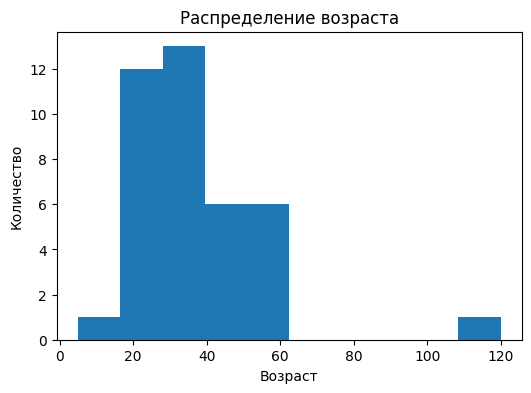

In [76]:
plt.figure(figsize=(6, 4))
plt.hist(df['age'].dropna(), bins=10)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Распределение возраста')
plt.show()

Построим боксплот, отображающий количественный признак - доход в среднем по странам. Видим, что наибольший доход пришёл из Германии, но при этом в РФ наиболее сильные "выбросы" значений.

<Figure size 600x400 with 0 Axes>

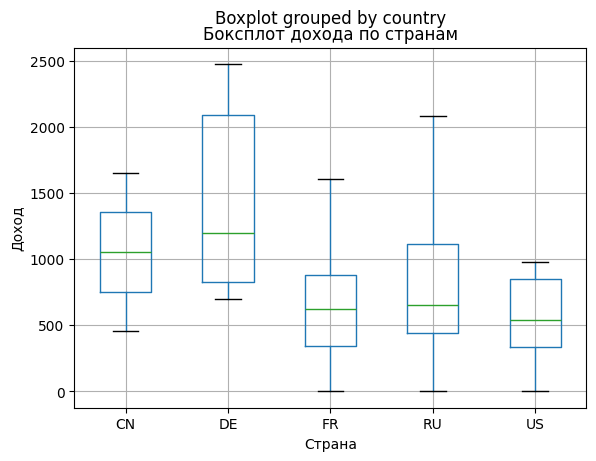

In [77]:
plt.figure(figsize=(6, 4))
df.boxplot(column='revenue', by='country')
plt.xlabel('Страна')
plt.ylabel('Доход')
plt.title('Боксплот дохода по странам')
plt.show()

Построим диаграмму рассеивания для количественных признаков age и revenue. Видим, что основное количсетво точек сосредоточено в области возраста 20-40 лет (что соответвует выяленному ранее).

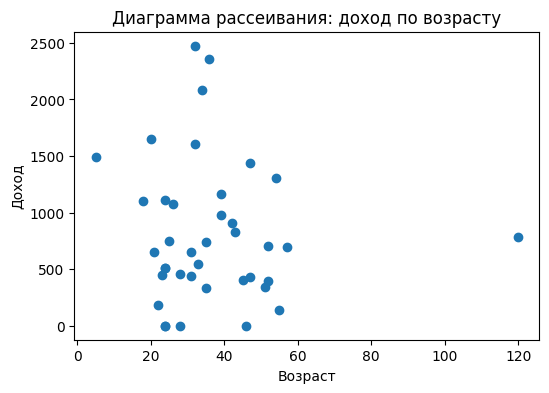

In [78]:
plt.figure(figsize=(6, 4))
scatter = plt.scatter(df['age'], df['revenue'])
plt.xlabel('Возраст')
plt.ylabel('Доход')
plt.title('Диаграмма рассеивания: доход по возрасту')
plt.savefig('figures/scatterplot01.png') # сохранение графика
plt.show()